# Playtika programming assignment - Sentiment classification

## 1. Get the dataset

The dataset was downloaded from https://ai.stanford.edu/~amaas/data/sentiment/.


It is composed of 50'000 movie reviews with polarity labels (positive/negative). 


As stated in the README, it is balanced (i.e. 50% positive and 50% negative reviews) and already splitted in half to provide balanced train and test sets. Each of the latter are composed of 25'000 samples, i.e. 12'500 positive reviews and 12'500 negative reviews.


Each review is provided in a single .txt file. To ease the use of the dataset, all the .txt files were merged in a single .txt file for the train set and same for the test set. This merging was done following those steps (https://github.com/aaronkub/machine-learning-examples/blob/master/imdb-sentiment-analysis/preprocess_reviews.sh). 

## 2. Data analysis

Let's take a look at some samples. The first 12'500 samples are positive reviews, and the last 12'500 samples negative reviews.

#### Train set

In [1]:
train_set = list()
for line in open('data/aclImdb/full_sets/full_train.txt', 'r'):
    train_set.append(line.strip())
    
train_set[35:40]

In [2]:
train_set = list()
for line in open('data/aclImdb/full_sets/full_train.txt', 'r'):
    train_set.append(line.strip())
    
train_set[13000:13005]

['This movie was the worst movie I have seen since "Date Movie." I was laughing through out the whole movie instead of being scared. It was funny how the snakes would search for particular section of the passengers body to attack for example, the eye, the tongue, the butt, the breast. If we have seen national geographic channel we know snakes wont stay clinched on the body once they bite. For each particular scene the snakes would bite the passengers and would stay on the body biting the person. I believe the producer did not study his information on snakes and their behavior. I cant believe I wasted my money on this movie.So I don\'t recommend this movie trust just wait until it is at the dollar theatre or rent it.',
 'I am sick and tired of all these little weenies going on about how this movie "rocked". It is pure CG over-acted CRAP! Don\'t send an Assassin, it\'s much more sensible to smuggle hundreds of brightly colored, aggressive, venomous Snakes on a Plane! The only reason peop

#### Test set

In [3]:
test_set = list()
for line in open('data/aclImdb/full_sets/full_test.txt', 'r'):
    test_set.append(line.strip())
    
test_set[60:65]

["Nicole Finn (Madonna) is just being released from prison. Although she is ordered to go by bus to Philadelphia, she wants to stick around the place she was arrested. This is because she claims she has information that would clear her record. Louden (Griffin Dunne) is assigned to escort her to the bus by his future father in law. Louden will be driving around the city anyway (in his future mother in law's Rolls Royce), picking up the wedding ring and a rare big, big cat for an eccentric collector. Nicki, however, starts the ensuing mayhem as soon as she jumps in the Rolls to take over the driving. Between big cats, taxi drivers, hit men, bridesmaids, and a wedding cake with guns, lawyer Louden knows he's not in Kansas anymore. Is there a way out of the madness? This film is a wild trip down comedy avenue. Madonna and Dunneare perfect foils to each other, making their connection uproarious, as they play out their roles as an ex-con and an uptight, button-down lawyer, respectively. The 

In [4]:
test_set = list()
for line in open('data/aclImdb/full_sets/full_test.txt', 'r'):
    test_set.append(line.strip())
    
test_set[15000:15005]

["I chose to watch this film because I am a Stephen Nichols fan. Unfortunately, I am unhappy with Mr. Nichols' choice to do this movie. The film was slow, badly acted, and included some very graphic sex scenes of Mr. Nichols' character with a very young woman. Watch at your own peril!",
 "Your idol will deceive you in this movie. Stephen Nichols is mis-cast as a young german student still bending under his father's orders although the actor obviously looks near 40 years-old. This makes his relationship (a collection of copulation scenes, basically) to a very young looking girl all the more disturbing. The character's have no dimension and the war depiction serves only as a backdrop for this soft porn wannabe. Nichols, who is one of daytime TV's best performers shows no passion in what is to be the main interest of this movie: watching him have sex over and over with this girl. It's like watching two animals going at it. If you're a fan of this actor's talent in other projects, don't re

From the README, we already know how many samples we have and how many of them belong to each class. Let's check the distribution of the length of the reviews for each class (positive/negative).

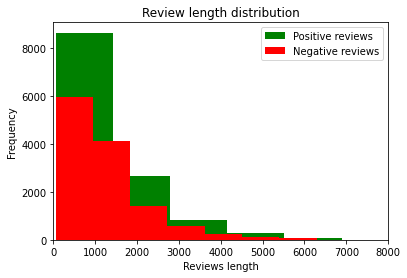

In [5]:
from src.helpers import get_reviews_length_histogram
get_reviews_length_histogram(train_set)

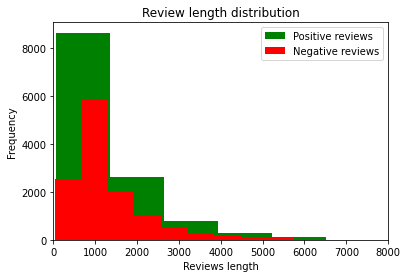

In [6]:
get_reviews_length_histogram(test_set)

In both cases, the shape of the distribution for negative and positive reviews is rather similar. However, it seems like negative reviews are in general shorter than positive reviews.

## 3. Clean data

From the samples shown in previous part, we see that some cleaning steps are needed before using the data for machine learning experiments. The cleaning steps include:

- removing line breaks
- removing non-alphabetical characters (numbers, symbols, punctuation)
- putting all reviews in lower cases 
- removing contractions such as "I'll"
- removing stop words ad words of < 2 letters
- removing urls

Those steps are implemented in the script `helpers.py`.

In [7]:
from src.helpers import clean_reviews

train_set_clean = clean_reviews(train_set)
test_set_clean = clean_reviews(test_set)

Here are some resulting reviews:

In [8]:
train_set_clean[35:40]

['previously wrote loved titanic cried ending many times guy also wondered great movie many awards applauded many critics given rating imdb com users well looked breakdown user ratings votes gave rating gave rating irrational imdb users effect pulled overall rating previous comments blamed unusual voting pattern sudden surge ratings high rating dropping gradually suddenly reversing course jumping rating level one thing hatred leonardo dicaprio believe tuned enough chat rooms see banter young people young men mostly defame left right absolutely hate man part giving credit titanic answer one user talking someone really like movie much gave etc everyone entitled taste one convince imdb rating overall titanic pulled level inordinate number ridiculous ratings fair reflection overall motion picture let demonstrate point comparing imdb user voting pattern titanic randomly chosen box office critical bombs many prove point heaven gate pulled theaters quickly poor box office showing imdb voters 

In [9]:
test_set_clean[60:65]

['nicole finn madonna released prison although ordered bus philadelphia wants stick around place arrested claims information would clear record louden griffin dunne assigned escort bus future father law louden driving around city anyway future mother law rolls royce picking wedding ring rare big big cat eccentric collector nicki however starts ensuing mayhem soon jumps rolls take driving big cats taxi drivers hit men bridesmaids wedding cake guns lawyer louden knows kansas anymore way madness film wild trip comedy avenue madonna dunneare perfect foils making connection uproarious play roles con uptight button lawyer respectively script laudable ability send viewer fits hysteria one implausible scene gives way next one next everything secondary supporting actors scenery costumes also quite nice know someone need jolt joy rent movie cheerio pronto',
 'rate movie sorry think classic comedy rating madonna movies well wanna tell best movie ever mira sorvino win oscar almost performance ten 

## 4. Tokenize and lemmatize

After text cleaning, the next step is to tokenize and then lemmatize. 

Those steps are implemented in the script `helpers.py`.

In [10]:
from src.helpers import tokenize_and_lemmatize

train_set_tok_lem = tokenize_and_lemmatize(train_set_clean)
test_set_tok_lem = tokenize_and_lemmatize(test_set_clean)

In [11]:
train_set_tok_lem[35:40]

['previously wrote loved titanic cried ending many time guy also wondered great movie many award applauded many critic given rating imdb com user well looked breakdown user rating vote gave rating gave rating irrational imdb user effect pulled overall rating previous comment blamed unusual voting pattern sudden surge rating high rating dropping gradually suddenly reversing course jumping rating level one thing hatred leonardo dicaprio believe tuned enough chat room see banter young people young men mostly defame left right absolutely hate man part giving credit titanic answer one user talking someone really like movie much gave etc everyone entitled taste one convince imdb rating overall titanic pulled level inordinate number ridiculous rating fair reflection overall motion picture let demonstrate point comparing imdb user voting pattern titanic randomly chosen box office critical bomb many prove point heaven gate pulled theater quickly poor box office showing imdb voter rating rating 

In [12]:
test_set_tok_lem[60:65]

['nicole finn madonna released prison although ordered bus philadelphia want stick around place arrested claim information would clear record louden griffin dunne assigned escort bus future father law louden driving around city anyway future mother law roll royce picking wedding ring rare big big cat eccentric collector nicki however start ensuing mayhem soon jump roll take driving big cat taxi driver hit men bridesmaid wedding cake gun lawyer louden know kansa anymore way madness film wild trip comedy avenue madonna dunneare perfect foil making connection uproarious play role con uptight button lawyer respectively script laudable ability send viewer fit hysteria one implausible scene give way next one next everything secondary supporting actor scenery costume also quite nice know someone need jolt joy rent movie cheerio pronto',
 'rate movie sorry think classic comedy rating madonna movie well wan na tell best movie ever mira sorvino win oscar almost performance ten year later please 

## 5. Create numerical representation of words 

To produce word embeddings, I chose to use the vectorizer provided by Scikit-Learn, which performs the Bag of Words representation. 

In [13]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train_set_tok_lem)
X = vectorizer.transform(train_set_tok_lem)
X_test = vectorizer.transform(test_set_tok_lem)

## 6. Train/Validation/test split

To be ready to use the dataset for machine learning, the final step is to split the dataset into train/validation/test sets. This was done using Scikit-Learn. In addition, labels (y) were produced, knowing that the first 12'500 reviews are positive (labeled as 1) and the last 12'500 are negative (labeled as 0). 

In [14]:
y = [1 if i < 12500 else 0 for i in range(25000)]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

## 7. Classify using logistic regression

First, let's try to classify the sentiment using logistic regression (from Scikit-Learn) as baseline. To select the best model, different values of C (L2 regularization) are used and tested on validation set to select the best model. 

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

val_accuracies = list()
c_values = np.linspace(0.05, 1, 20)

for c in c_values:
    log_reg = LogisticRegression(C=c, max_iter=200)
    log_reg.fit(X_train, y_train)
    val_accuracies.append(accuracy_score(y_val, log_reg.predict(X_val)))

best_acc = max(val_accuracies)
best_acc_idx = val_accuracies.index(best_acc)

print('Best model is obtained with c =', c_values[best_acc_idx], " leading to a validation accuracy of %s." % best_acc)

Best model is obtained with c = 0.1  leading to a validation accuracy of 0.8854.


In [17]:
best_model = LogisticRegression(C=c_values[best_acc_idx])
best_model.fit(X, y)
print ("Accuracy of best model on test set: %s" % accuracy_score(y, best_model.predict(X_test)))

Accuracy of best model on test set: 0.87712


## 8. Classify using a neural network

Let's try to classify with a neural network now. First without regularization and a constant learning rate. 

In [18]:
from sklearn.neural_network import MLPClassifier


val_accuracies = list()
learning_rates = [1e-4, 1e-3, 1e-2]

for lr in learning_rates:
    neural_net = MLPClassifier(alpha=0, random_state=1, learning_rate_init=lr, max_iter=100)
    neural_net.fit(X_train, y_train)
    val_accuracies.append(accuracy_score(y_val, neural_net.predict(X_val)))
best_acc = max(val_accuracies)
best_acc_idx = val_accuracies.index(best_acc)

print('Best model is obtained with lr =', learning_rates[best_acc_idx], " leading to a validation accuracy of %s." % best_acc)

Best model is obtained with lr = 0.01  leading to a validation accuracy of 0.8838.


In [19]:
best_model = MLPClassifier(alpha=0, random_state=1, learning_rate_init=learning_rates[best_acc_idx], max_iter=100)
best_model.fit(X, y)
print ("Accuracy of best model on test set: %s" % accuracy_score(y, best_model.predict(X_test)))

Accuracy of best model on test set: 0.85504


## 9. Further work

To further improve this work, I would try other word embeddings methods such as Word2vec or GloVe, which take into account the semantic of the words.

In addition, regarding the neural network, several elements could be tuned. I would try more values for the learning rate and I would train for more epochs. Moreover, I would also try to use an adaptive learning rate instead of a constant one, and also try to add some regularization to see if it improves the performances. 

Then I would also try other neural-networks-based models. 